In [1]:
import pandas as pd
import plotly.express as px

In [2]:
profiles = {
    "ORF": "wellpos_cc_var_mad_outlier_featselect_sphering_harmony",
    "CRISPR": "wellpos_var_mad_int_featselect_harmony_PCA_corrected",
}

all_profiles = {
    "ORF": "wellpos_cc_var_mad_outlier_featselect_sphering_harmony",
    "ORF-CRISPR-pipeline": "wellpos_var_mad_int_featselect_harmony_PCA",
    "CRISPR": "wellpos_var_mad_int_featselect_harmony_PCA_corrected",
    "CRISPR-ORF-pipeline": "wellpos_cc_var_mad_outlier_featselect_sphering_harmony_PCA_corrected",
}

modality = {
    "ORF": "ORF",
    "CRISPR": "CRISPR",
    "ORF-CRISPR-pipeline": "ORF",
    "CRISPR-ORF-pipeline": "CRISPR",
}

pipeline = {
    "ORF": "Best pipeline",
    "CRISPR": "Best pipeline",
    "ORF-CRISPR-pipeline": "Other modality's pipeline",
    "CRISPR-ORF-pipeline": "Other modality's pipeline",
}

color_discrete_map = {
    "Best pipeline": "rgb(0, 114, 178)",
    "Other modality's pipeline": "rgb(213, 94, 0)",
}

gene_labels = {
    "Protein Class": "protein_class",
    "Disease Association": "disease_association",
    "CORUM Complex": "corum_complex",
    "Wikipathway": "wikipathway",
    "HGNC Gene Group": "gene-group",
}

Read phenotypic activity data

In [3]:
phenotypic_activity_df = pd.DataFrame()

for profile in profiles:
    df = pd.read_csv(f"output/phenotypic-activity-{profiles[profile]}.csv.gz")
    df["profile_type"] = profile
    df["modality"] = modality[profile]
    df["pipeline"] = pipeline[profile]
    phenotypic_activity_df = pd.concat(
        [phenotypic_activity_df, df], ignore_index=True, axis=0
    )

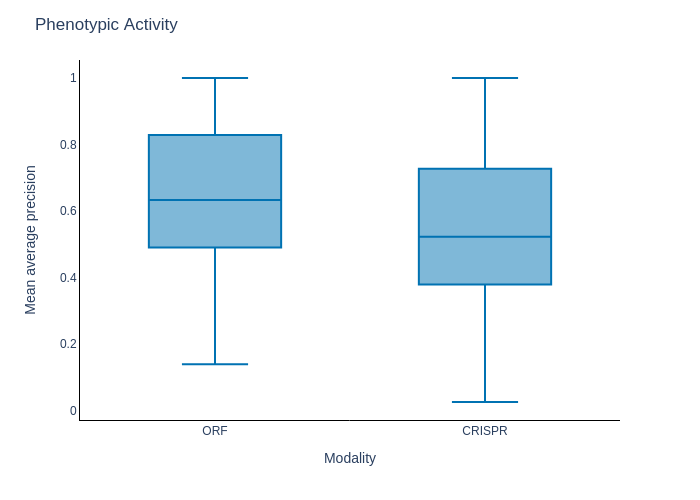

In [4]:
fig = px.box(
    phenotypic_activity_df,
    x="modality",
    y="mean_average_precision",
    color="pipeline",
    color_discrete_map=color_discrete_map,
).update_layout(
    title="Phenotypic Activity",
    xaxis=dict(title="Modality", linecolor="black"),
    yaxis=dict(title="Mean average precision", linecolor="black"),
    plot_bgcolor="white",
    paper_bgcolor="white",
    showlegend=False,
)

fig.show("png")
fig.write_image("figures/phenotypic-activity-best-profiles.png", height=480, width=640, scale=2)
fig.write_image("figures/phenotypic-activity-best-profiles.svg", height=480, width=640, scale=2)

In [5]:
fraction_retrieved = (
    phenotypic_activity_df.groupby("profile_type")
    .below_corrected_p.apply(lambda x: (x == True).sum() / len(x))
    .reset_index()
    .rename(columns={"below_corrected_p": "fraction_retrieved"})
)

print(fraction_retrieved.to_markdown(index=False))

| profile_type   |   fraction_retrieved |
|:---------------|---------------------:|
| CRISPR         |             0.713121 |
| ORF            |             0.568964 |


In [6]:
n_retrieved = (
    phenotypic_activity_df.groupby("profile_type")
    .below_corrected_p.apply(lambda x: (x == True).sum())
    .reset_index()
    .rename(columns={"below_corrected_p": "n_retrieved"})
)

print(n_retrieved.to_markdown(index=False))

| profile_type   |   n_retrieved |
|:---------------|--------------:|
| CRISPR         |          5685 |
| ORF            |          7817 |


In [7]:
all_phenotypic_activity_df = pd.DataFrame()

for profile in all_profiles:
    df = pd.read_csv(f"output/phenotypic-activity-{all_profiles[profile]}.csv.gz")
    df["profile_type"] = profile
    df["modality"] = modality[profile]
    df["pipeline"] = pipeline[profile]
    all_phenotypic_activity_df = pd.concat(
        [all_phenotypic_activity_df, df], ignore_index=True, axis=0
    )

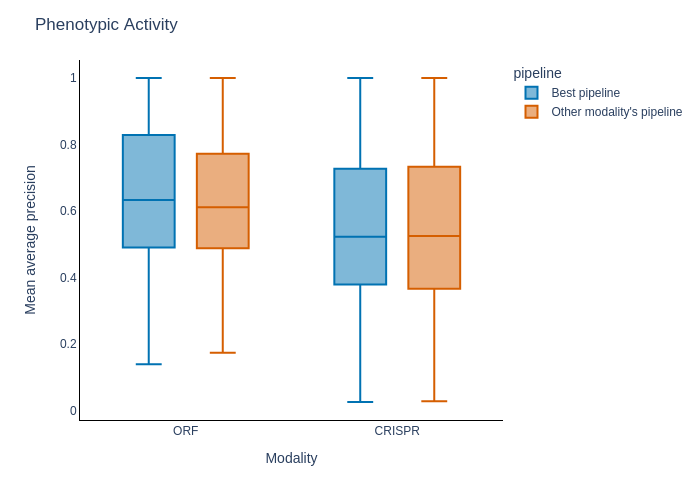

In [8]:
fig = px.box(
    all_phenotypic_activity_df,
    x="modality",
    y="mean_average_precision",
    color="pipeline",
    color_discrete_map=color_discrete_map,
).update_layout(
    title="Phenotypic Activity",
    xaxis=dict(title="Modality", linecolor="black"),
    yaxis=dict(title="Mean average precision", linecolor="black"),
    plot_bgcolor="white",
    paper_bgcolor="white",
)

fig.show("png")
fig.write_image("figures/phenotypic-activity-all-profiles.png", height=480, width=640, scale=2)
fig.write_image("figures/phenotypic-activity-all-profiles.svg", height=480, width=640, scale=2)

In [9]:
fraction_retrieved = (
    all_phenotypic_activity_df.groupby("profile_type")
    .below_corrected_p.apply(lambda x: (x == True).sum() / len(x))
    .reset_index()
    .rename(columns={"below_corrected_p": "fraction_retrieved"})
)

print(fraction_retrieved.to_markdown(index=False))

| profile_type        |   fraction_retrieved |
|:--------------------|---------------------:|
| CRISPR              |             0.713121 |
| CRISPR-ORF-pipeline |             0.69581  |
| ORF                 |             0.568964 |
| ORF-CRISPR-pipeline |             0.508334 |


In [10]:
n_retrieved = (
    all_phenotypic_activity_df.groupby("profile_type")
    .below_corrected_p.apply(lambda x: (x == True).sum())
    .reset_index()
    .rename(columns={"below_corrected_p": "n_retrieved"})
)

print(n_retrieved.to_markdown(index=False))

| profile_type        |   n_retrieved |
|:--------------------|--------------:|
| CRISPR              |          5685 |
| CRISPR-ORF-pipeline |          5547 |
| ORF                 |          7817 |
| ORF-CRISPR-pipeline |          6984 |


In [11]:
gene_label_retrieval_df = pd.DataFrame()

for gene_label in gene_labels:
    df = (
        pd.read_parquet(f"output/{gene_labels[gene_label]}_retrieval.parquet")[
            ["mean_average_precision", "below_corrected_p", "Profile_type"]
        ]
        .assign(gene_label=gene_label)
        .assign(pipeline=lambda x: x.apply(lambda y: pipeline[y["Profile_type"]], axis=1))
        .assign(Modality=lambda x: x.apply(lambda y: modality[y["Profile_type"]], axis=1))
    )
    gene_label_retrieval_df = pd.concat(
        [gene_label_retrieval_df, df], ignore_index=True, axis=0
    )

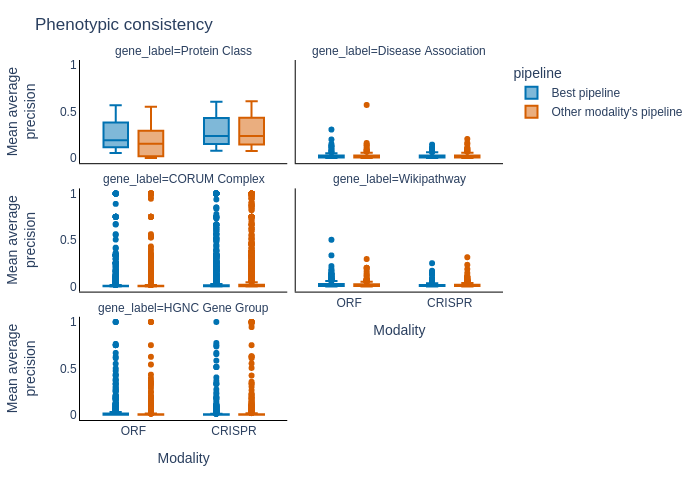

In [12]:
fig = (
    px.box(
        gene_label_retrieval_df,
        x="Modality",
        y="mean_average_precision",
        color="pipeline",
        color_discrete_map=color_discrete_map,
        facet_col="gene_label",
        facet_col_wrap=2,
    )
    .update_layout(
        title="Phenotypic consistency",
        xaxis1=dict(title="Modality",linecolor="black"),
        xaxis3=dict(linecolor="black"),
        xaxis4=dict(title="Modality", linecolor="black", showticklabels=True),
        xaxis5=dict(linecolor="black"),
        xaxis6=dict(linecolor="black"),
        yaxis1=dict(title=f"Mean average<br>precision", linecolor="black"),
        yaxis3=dict(title=f"Mean average<br>precision", linecolor="black"),
        yaxis4=dict(linecolor="black"),
        yaxis5=dict(title=f"Mean average<br>precision",linecolor="black"),
        yaxis6=dict(linecolor="black"),
        plot_bgcolor="white",
    )
)

fig.show("png")
fig.write_image("figures/phenotypic-consistency-gene-labels.png", height=480, width=640, scale=2)
fig.write_image("figures/phenotypic-consistency-gene-labels.svg", height=480, width=640, scale=2)

In [13]:
print(
    gene_label_retrieval_df.query("below_corrected_p == True")
    .groupby(["Profile_type", "gene_label"])
    .mean_average_precision.count()
    .reset_index()
    .pivot(index="Profile_type", columns="gene_label", values="mean_average_precision")
    .sort_index()
    [list(gene_labels.keys())]
    .to_markdown()
)

| Profile_type        |   Protein Class |   Disease Association |   CORUM Complex |   Wikipathway |   HGNC Gene Group |
|:--------------------|----------------:|----------------------:|----------------:|--------------:|------------------:|
| CRISPR              |               1 |                     1 |             296 |            91 |                61 |
| CRISPR-ORF-pipeline |               1 |                     3 |             366 |           151 |                89 |
| ORF                 |               5 |                     2 |             103 |           347 |               196 |
| ORF-CRISPR-pipeline |               1 |                     2 |              86 |           257 |                51 |
